<a href="https://colab.research.google.com/github/Fiona-cherutto/Spambase-Machine-Learning/blob/main/Moringa_Data_Science_Core_W9_Independent___Project_2020_07_FIONA_CHERUTTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAMBASE

## 1. Defining the Question

### a) Specifying the Data Analytic Question



Build a classifier model using Naive Bayes Classifier to classify whether an email is a spam or non-spam.

### b) Defining the Metric for Success

This project will be successful when: 
*  We accurately predict spam or non-spam Naive bayes with an 80%  accuracy of the model.




### c) Understanding the context 

Spam are irrelevant messages sent over the Internet, typically to a large number of users, for the purposes of advertising. They are sent for commercial purposes.One disadvantage of spam emails is that it can be a malicious attempt to gain access to your computer. Using Machine learning algorithmns such as Deep Learning, Naive Bayes, Support Vector Machines, Neural Networks, etc. we  can be used to identify whether an email is spam or not. In our case will be using Naive Bayes as our main algorithin and later challange with the other algorithim to see which performs best.

### d) Recording the Experimental Design

For this analysis will follow the following steps below


1.   Loading and previewing data
2.   Data cleanining
3.   EDA
4.   Implimenting the solution
5.   Challenging the solution
6.   Follow up question

### e) Data Relevance



The data provided for the analysis is a collection of spam e-mails came from  postmaster and individuals who had filed spam. Collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter

In [85]:
%%html
<marquee style='width: 70%;  color: red;'><b>We will work as a Data Scientist  to build a classifier model using Naive Bayes Classifier to classify whether an email is a spam or non-spam.!</b></marquee>

### 2. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Loading Data

In [2]:
from google.colab import files
files.upload()

!unzip -q  spambase analyst_Dataset.zip
!pip install --upgrade seaborn

Saving spambase_csv.csv to spambase_csv.csv
unzip:  cannot find or open spambase, spambase.zip or spambase.ZIP.
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


## 3. Reading the Data

In [73]:
# Loading the Data from the source i.e. csv
# ---

# ---
#
# ---
df = pd.read_csv('/content/spambase_csv.csv')
# ---
#




## 4. Checking the Data

In [4]:

# Determining the no. of records in our dataset
print(f'\ndf spambase  contains {df.shape[0]} samples and {df.shape[1]} variables')


df spambase  contains 4601 samples and 58 variables


In [5]:
# Previewing the top of our dataset
#
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [7]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [8]:
#obtaining more information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## 5. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 6. Tidying the Dataset

In [9]:
# Checking for Outliers
#
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(df)

# Predict outliers
outlier_detector.predict(df)

array([ 1,  1, -1, ...,  1,  1,  1])

In [10]:
# Checking for Anomalies
#

In [11]:
# Identifying the Missing Data
#
df.isnull().sum().any()


False

In [12]:
# More data cleaning procedures
#

### 5. Exploratory Analysis

>Measures of Central Tendency

In [13]:
#Median
df.median()

word_freq_make                 0.000
word_freq_address              0.000
word_freq_all                  0.000
word_freq_3d                   0.000
word_freq_our                  0.000
word_freq_over                 0.000
word_freq_remove               0.000
word_freq_internet             0.000
word_freq_order                0.000
word_freq_mail                 0.000
word_freq_receive              0.000
word_freq_will                 0.100
word_freq_people               0.000
word_freq_report               0.000
word_freq_addresses            0.000
word_freq_free                 0.000
word_freq_business             0.000
word_freq_email                0.000
word_freq_you                  1.310
word_freq_credit               0.000
word_freq_your                 0.220
word_freq_font                 0.000
word_freq_000                  0.000
word_freq_money                0.000
word_freq_hp                   0.000
word_freq_hpl                  0.000
word_freq_george               0.000
w

>Measures of Dispersion

>Standard Deviation

In [14]:
# Finding the standard deviation
df.std()

word_freq_make                  0.305358
word_freq_address               1.290575
word_freq_all                   0.504143
word_freq_3d                    1.395151
word_freq_our                   0.672513
word_freq_over                  0.273824
word_freq_remove                0.391441
word_freq_internet              0.401071
word_freq_order                 0.278616
word_freq_mail                  0.644755
word_freq_receive               0.201545
word_freq_will                  0.861698
word_freq_people                0.301036
word_freq_report                0.335184
word_freq_addresses             0.258843
word_freq_free                  0.825792
word_freq_business              0.444055
word_freq_email                 0.531122
word_freq_you                   1.775481
word_freq_credit                0.509767
word_freq_your                  1.200810
word_freq_font                  1.025756
word_freq_000                   0.350286
word_freq_money                 0.442636
word_freq_hp    

>Variance

In [15]:
# Finding the standard deviation
df.var()

word_freq_make                     0.093243
word_freq_address                  1.665584
word_freq_all                      0.254160
word_freq_3d                       1.946447
word_freq_our                      0.452273
word_freq_over                     0.074980
word_freq_remove                   0.153226
word_freq_internet                 0.160858
word_freq_order                    0.077627
word_freq_mail                     0.415710
word_freq_receive                  0.040620
word_freq_will                     0.742524
word_freq_people                   0.090623
word_freq_report                   0.112348
word_freq_addresses                0.067000
word_freq_free                     0.681932
word_freq_business                 0.197185
word_freq_email                    0.282091
word_freq_you                      3.152332
word_freq_credit                   0.259862
word_freq_your                     1.441944
word_freq_font                     1.052175
word_freq_000                   

>Inter-Quartile Range

In [16]:
# Finding the quantiles 
df.quantile([0.25,0.5,0.75])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0.25,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.588,6.0,35.0,0.0
0.50,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.31,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.065,0.0,0.000,0.000,0.0,2.276,15.0,95.0,0.0
0.75,0.0,0.0,0.42,0.0,0.38,0.0,0.0,0.0,0.0,0.16,0.0,0.8,0.0,0.0,0.0,0.1,0.0,0.0,2.64,0.0,1.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.188,0.0,0.315,0.052,0.0,3.706,43.0,266.0,1.0


>Skeweness

In [17]:
# Determining the skeweness
df.skew()

word_freq_make                 5.675639
word_freq_address             10.086811
word_freq_all                  3.009249
word_freq_3d                  26.227744
word_freq_our                  4.747126
word_freq_over                 5.956953
word_freq_remove               6.765580
word_freq_internet             9.724848
word_freq_order                5.226067
word_freq_mail                 8.487810
word_freq_receive              5.510250
word_freq_will                 2.867354
word_freq_people               6.955548
word_freq_report              11.754645
word_freq_addresses            6.971041
word_freq_free                10.763594
word_freq_business             5.688642
word_freq_email                5.413754
word_freq_you                  1.591674
word_freq_credit              14.602587
word_freq_your                 2.435527
word_freq_font                 9.975441
word_freq_000                  5.713775
word_freq_money               14.687028
word_freq_hp                   5.716843


>Kurtosis

In [18]:
# Determining the Kurtosis 
df.kurt()

word_freq_make                  49.305064
word_freq_address              105.647472
word_freq_all                   13.308743
word_freq_3d                   726.451538
word_freq_our                   37.941169
word_freq_over                  68.445258
word_freq_remove                75.413439
word_freq_internet             169.162876
word_freq_order                 46.940256
word_freq_mail                 161.214641
word_freq_receive               39.650945
word_freq_will                  12.550747
word_freq_people                84.941822
word_freq_report               229.201271
word_freq_addresses             57.727676
word_freq_free                 196.424975
word_freq_business              45.673775
word_freq_email                 47.961674
word_freq_you                    5.257394
word_freq_credit               383.001882
word_freq_your                   9.009506
word_freq_font                 109.142325
word_freq_000                   46.807860
word_freq_money                302

In [19]:
num = df.describe()
num

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

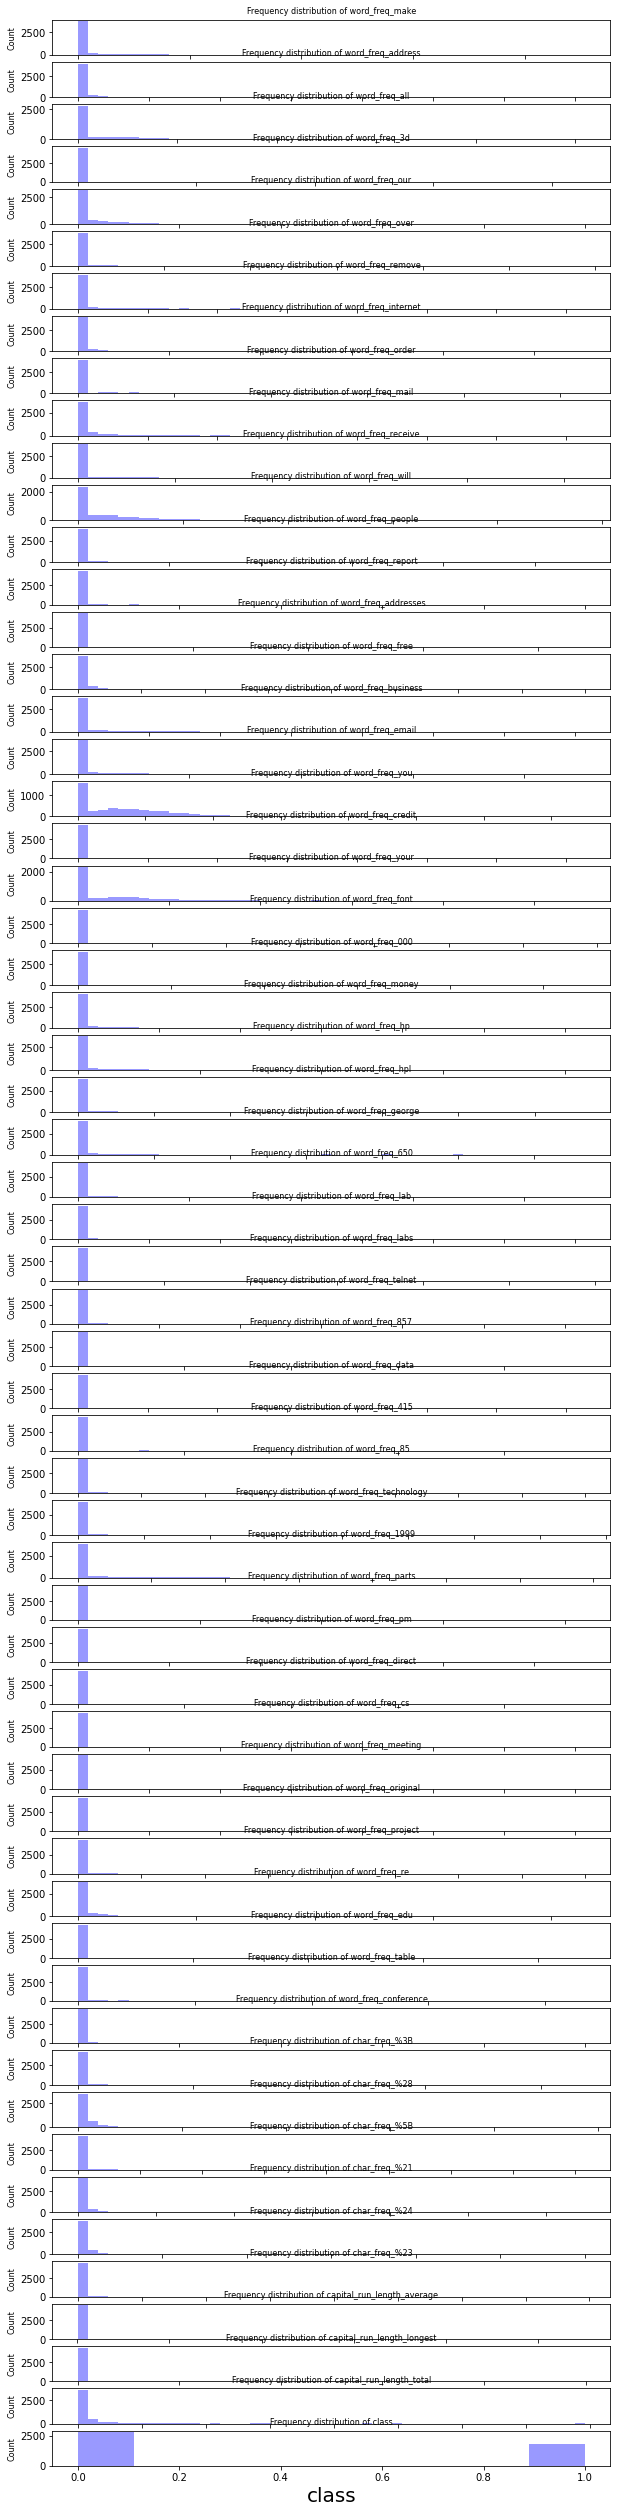

In [21]:
#distribution of the features
import matplotlib.pyplot as plt
import seaborn as sns

col_names = df.columns
fig, ax = plt.subplots(len(col_names), figsize=(10,45))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i], kde = False, color = 'blue')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=8)
    ax[i].set_xlabel(col_val, fontsize=20)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

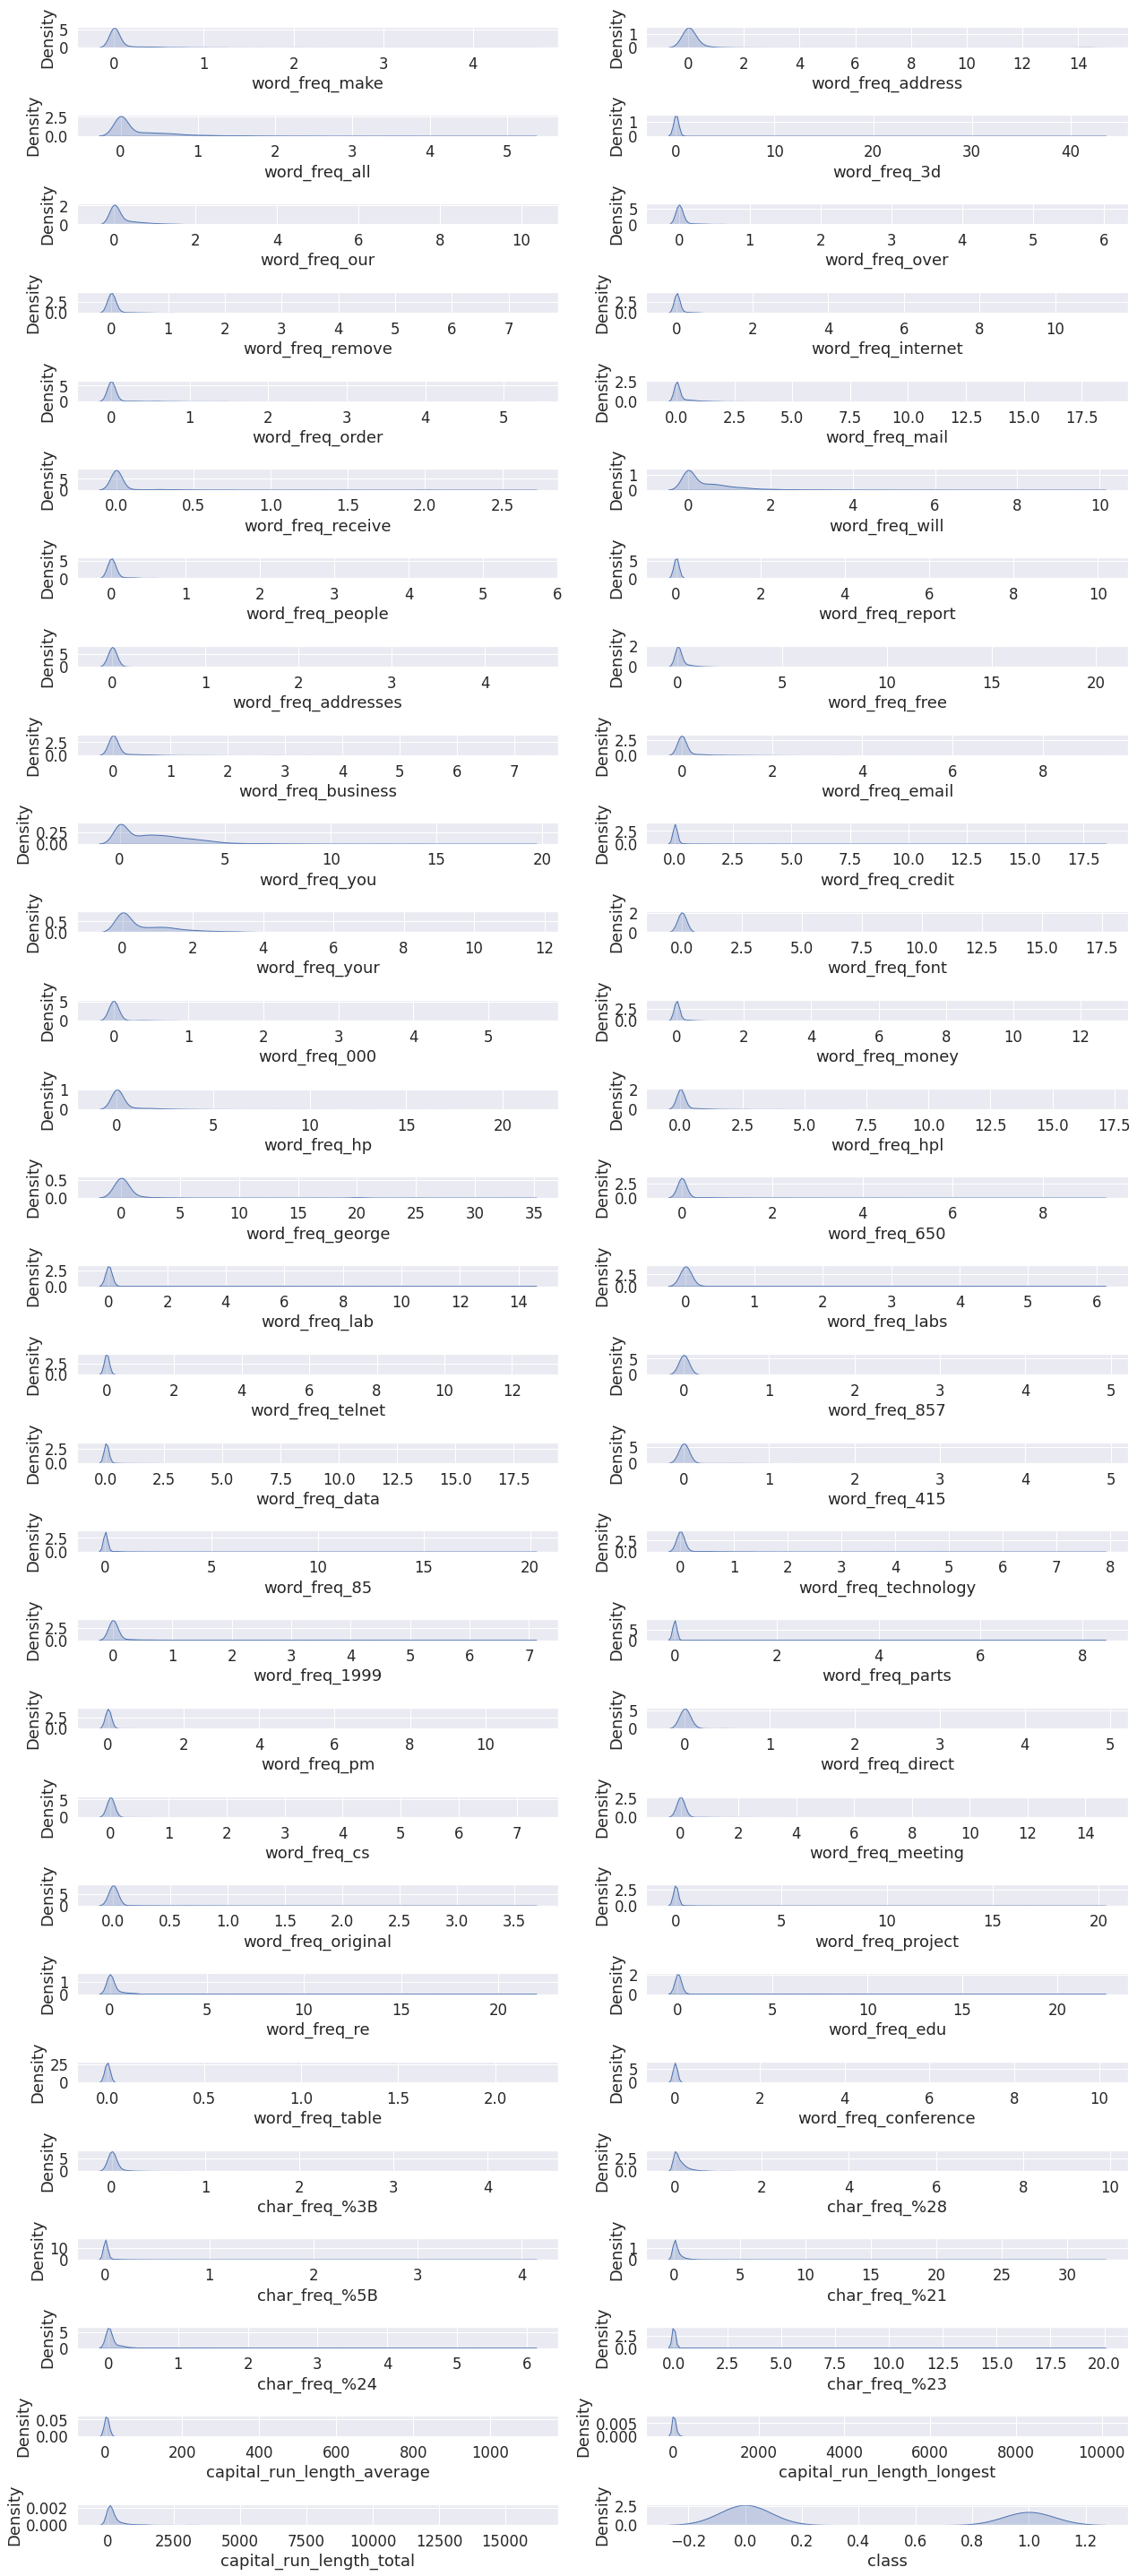

In [22]:
# Plotting density plots to show dispersion of 
# Setting the figure size to 18 by 25

import seaborn as sns
sns.set(font_scale=1.5)
fig, axes = plt.subplots(29, 2, figsize=(18, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num):
  plot = sns.kdeplot(data=df, x=c, ax=axes[i], fill=True)
plt.tight_layout()



In [23]:
df.rename(columns = {'class':'classs'}, inplace = True)

In [24]:
df['classs'].value_counts()

0    2788
1    1813
Name: classs, dtype: int64


1 for spam emails have a count of 1813 , 0 for not spam emails have a count of 2788

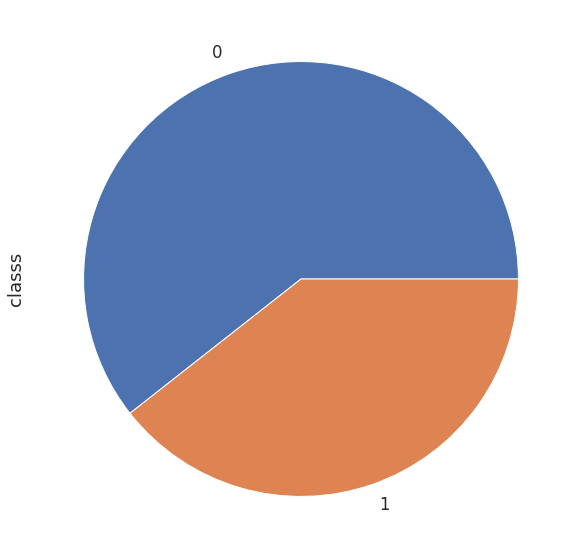

In [25]:
#The percantage of 
df.classs.value_counts().plot(kind = 'pie',figsize = (15, 10))
plt.show()

0    2788
1    1813
Name: classs, dtype: int64

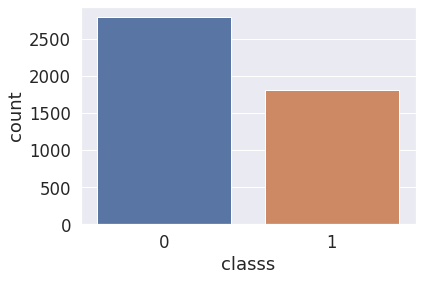

In [26]:
import plotly.express as px
sns.countplot(df["classs"])
df["classs"].value_counts()

In [27]:
fig= px.histogram(df, x="classs")
fig.show()

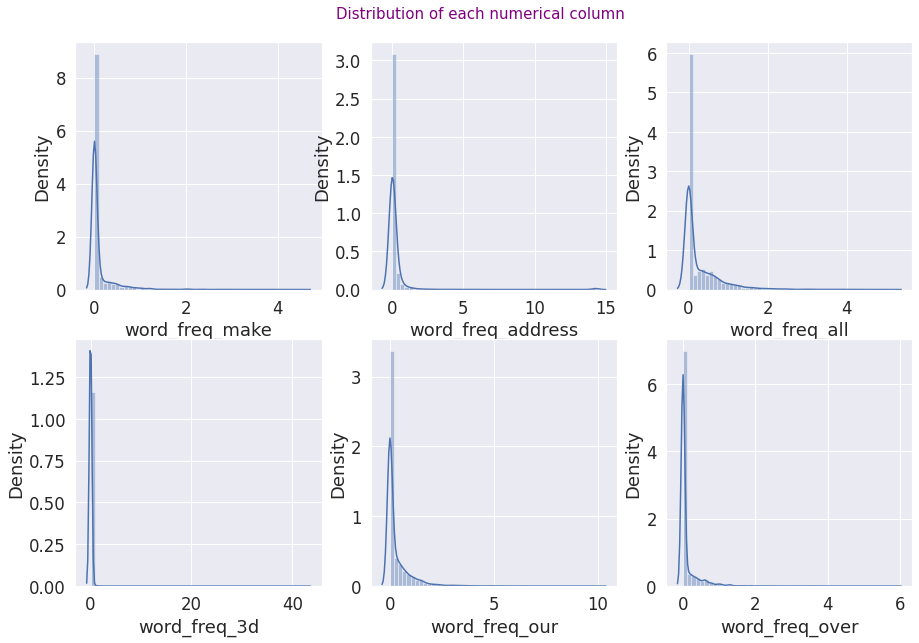

In [28]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Distribution of each numerical column', y= 0.93, color = 'purple', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, num):
  sns.distplot(df[name], ax = ax)

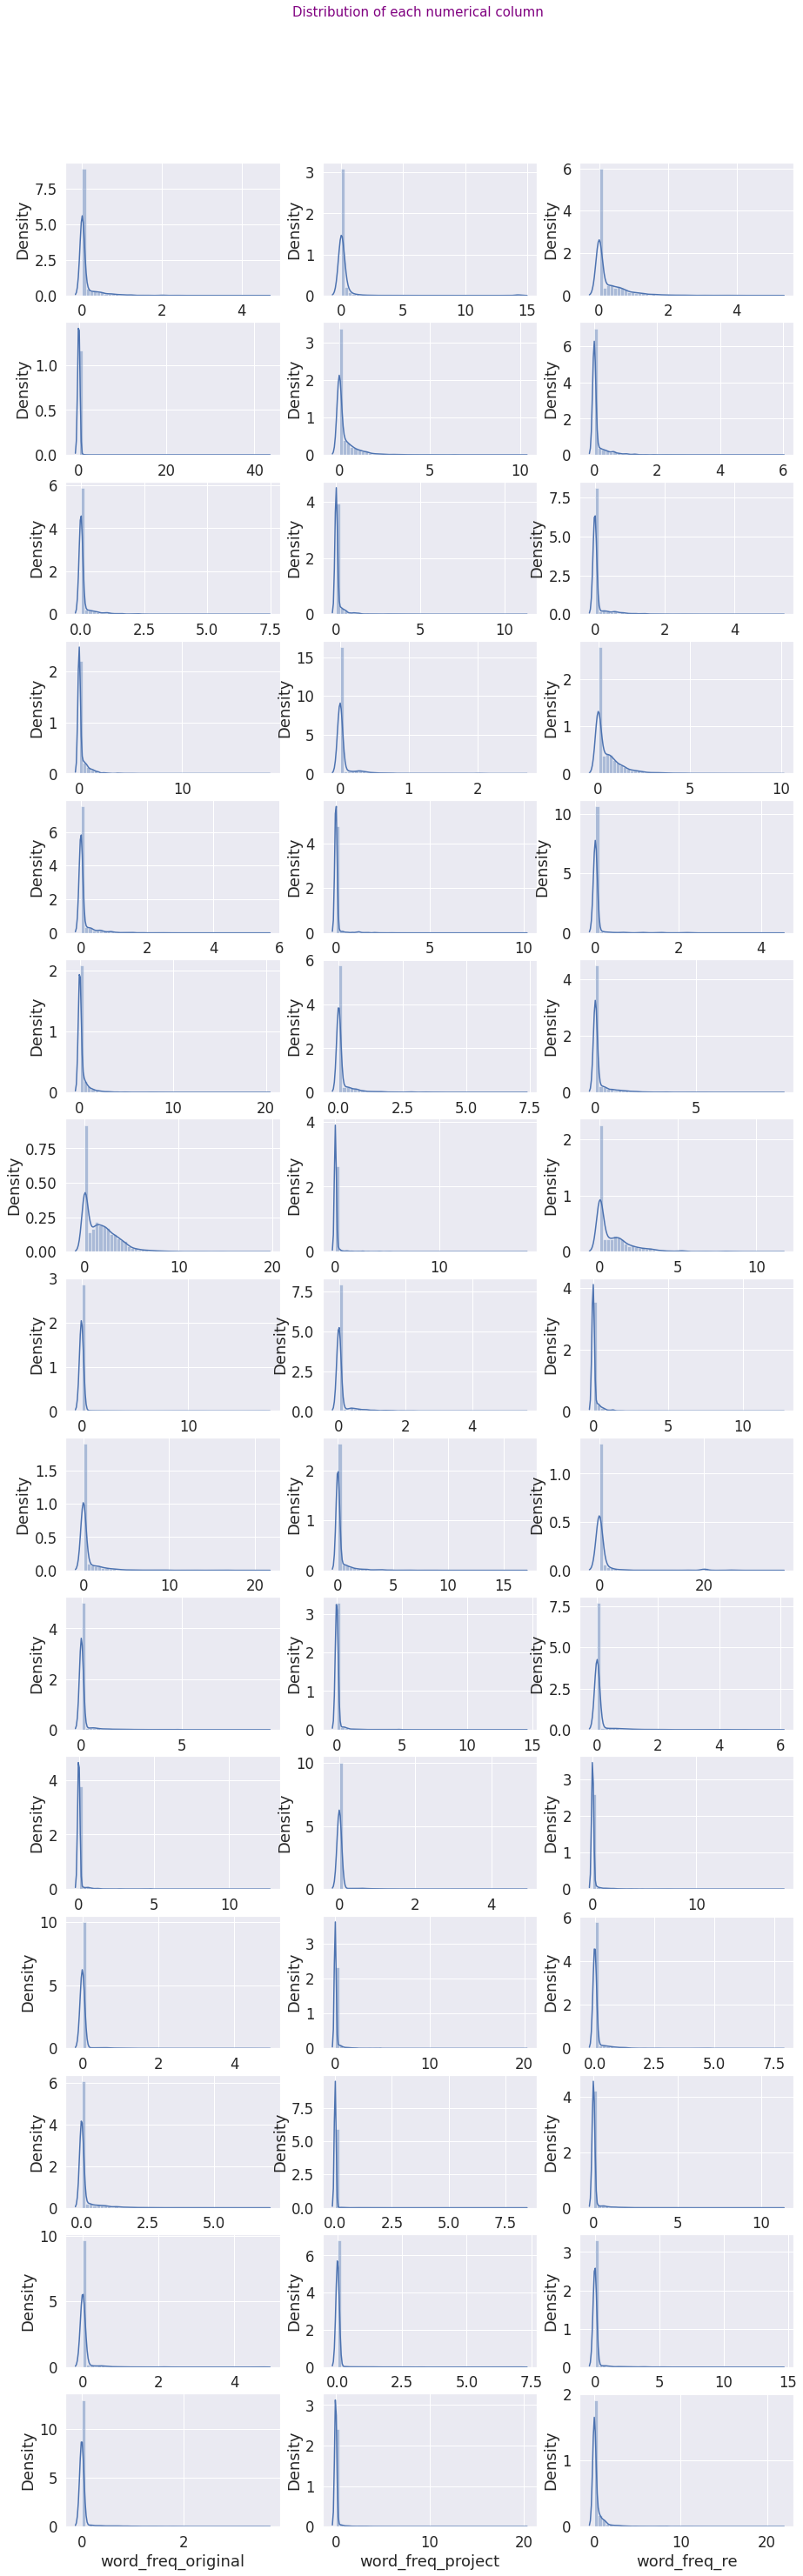

In [29]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 15, ncols = 3, figsize = (15, 50))
fig.suptitle('Distribution of each numerical column', y= 0.93, color = 'purple', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, num):
  sns.distplot(df[name], ax = ax)

>Bivarient Analysis

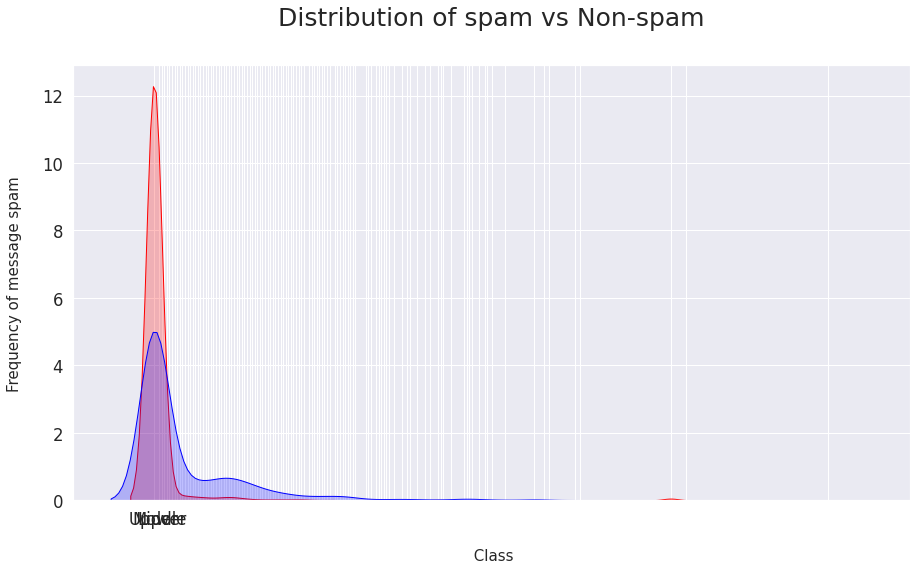

In [30]:
# Ploting the bivariate summaries and recording our observations
#
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df.word_freq_receive[df.classs == 0] , 
               color='red',
               shade=True,
               label='not spam')
ax=sns.kdeplot(df.loc[(df['classs'] == 1),'word_freq_receive'] , 
               color='blue',
               shade=True, 
               label='spam', 
              )
plt.title('Distribution of spam vs Non-spam', fontsize = 25, pad = 40)
plt.ylabel("Frequency of message spam", fontsize = 15, labelpad = 20)
plt.xlabel(" Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df.word_freq_receive.unique()), labels);

In [31]:
fig = px.pie(df, values="word_freq_receive", names="classs")
fig.show()

In [32]:
# checking for multicollinearity
corr = df.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,classs
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956

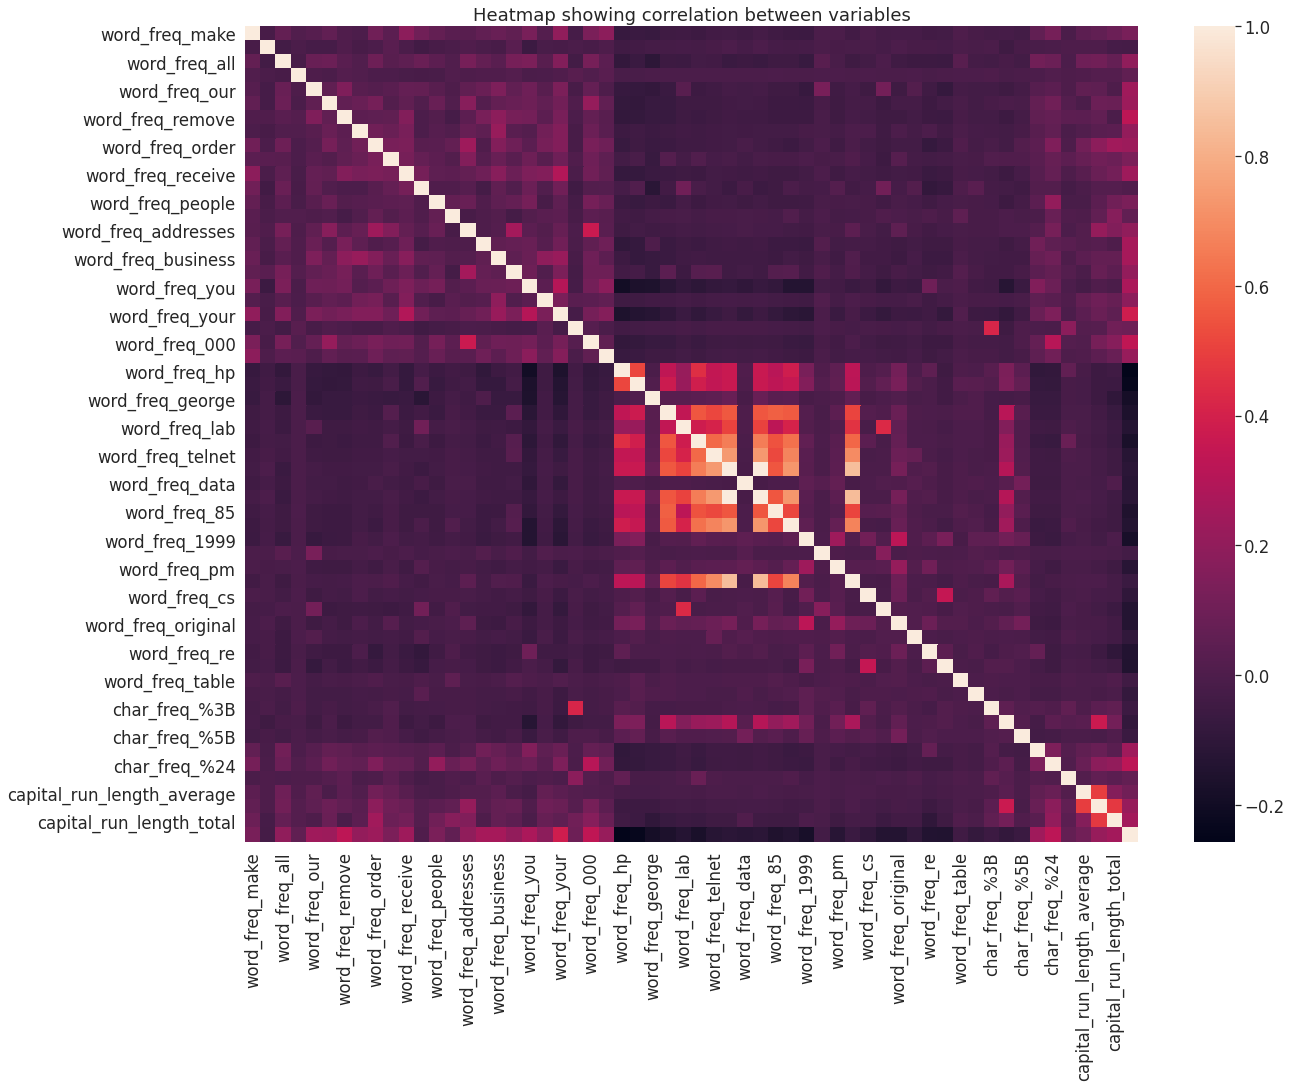

In [33]:
# Checking for correlations between features
#
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr()) 
plt.title('Heatmap showing correlation between variables')
plt.show()

## 7. Implementing the Solution

>Naive Bayes Classifier 80-20 Split

In [42]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
# make class predictions for X_test
y_pred = nb.predict(X_test)
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921

[[454  84]
 [ 89 294]]
The accuracy : 0.8121606948968513


In [43]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training our model
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)


# make class predictions for X_test
y_pred_class = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

# Evaluating the predictions made by the model

# Using Classification report
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))



CPU times: user 3.48 ms, sys: 28 µs, total: 3.5 ms
Wall time: 3.52 ms
0.8121606948968513
[[454  84]
 [ 89 294]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



>Naive Bayes Classifier 70-30 Split

In [44]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
# make class predictions for X_test
y_pred = nb.predict(X_test)
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       822
           1       0.77      0.75      0.76       559

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381

[[696 126]
 [138 421]]
The accuracy : 0.8088341781317886


>Naive Bayes Classifier 60-40 Split 

In [50]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
# make class predictions for X_test
y_pred = nb.predict(X_test)
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1097
           1       0.78      0.75      0.76       744

    accuracy                           0.81      1841
   macro avg       0.81      0.80      0.80      1841
weighted avg       0.81      0.81      0.81      1841

[[937 160]
 [185 559]]
The accuracy : 0.8126018468223791


>Gaussian

In [64]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
# Training the model.
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

gauss = GaussianNB()
gauss = GaussianNB().fit(X_train, y_train)


# Predicting
y_pred = gauss.predict(X_test)

# Evaluating the predictions made by the model

# Using Classification report
print(classification_report(y_test, y_pred))


#  Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       538
           1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921

[[386 152]
 [ 26 357]]
The accuracy : 0.8067318132464713


In [65]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
# Training the model.
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gauss = GaussianNB()
gauss = GaussianNB().fit(X_train, y_train)


# Predicting
y_pred = gauss.predict(X_test)

# Evaluating the predictions made by the model

# Using Classification report
print(classification_report(y_test, y_pred))


#  Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381

[[597 225]
 [ 34 525]]
The accuracy : 0.8124547429398986


In [66]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
# Training the model.
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

gauss = GaussianNB()
gauss = GaussianNB().fit(X_train, y_train)


# Predicting
y_pred = gauss.predict(X_test)

# Evaluating the predictions made by the model

# Using Classification report
print(classification_report(y_test, y_pred))


#  Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1097
           1       0.72      0.94      0.81       744

    accuracy                           0.83      1841
   macro avg       0.83      0.85      0.83      1841
weighted avg       0.86      0.83      0.83      1841

[[819 278]
 [ 42 702]]
The accuracy : 0.8261814231395981


>Important features

[0.01065534 0.01136357 0.02560976 0.00251477 0.02717132 0.01319608
 0.05827751 0.01549803 0.01607157 0.01139882 0.02230617 0.01362051
 0.00661144 0.00472326 0.01334887 0.04209896 0.02623431 0.01577969
 0.03644564 0.00979618 0.06979537 0.00771773 0.04175679 0.02750831
 0.03912044 0.01954727 0.02743115 0.01133996 0.00599086 0.0112947
 0.00489063 0.002871   0.00602234 0.00251582 0.00497815 0.00676658
 0.01538894 0.0013836  0.00559646 0.00344923 0.00358311 0.01126675
 0.00486734 0.00578326 0.01549559 0.0216511  0.00078831 0.00247381
 0.0088302  0.01398758 0.00437408 0.05020826 0.05011834 0.00597253
 0.0323703  0.03552926 0.03461306]


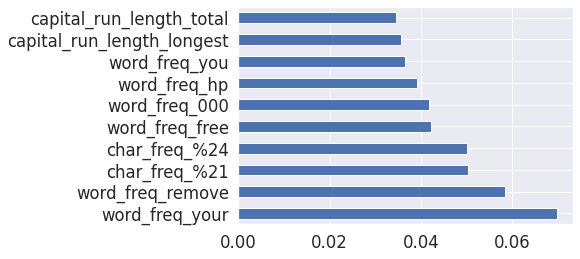

In [56]:
#selecting the top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [68]:
X = df[['word_freq_your', 'char_freq_%24', 'word_freq_remove', 'char_freq_%21', 'word_freq_free', 'word_freq_hp', 
        'word_freq_000', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']]
y = df['classs']
# Training the model.
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training our model
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
#train the model 
%time nb.fit(X_train, y_train)


# make class predictions for X_test
y_pred_class = nb.predict(X_test)
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

# Evaluating the predictions made by the model

# Using Classification report
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)


#  Using  the accuracy score



CPU times: user 3.37 ms, sys: 22 µs, total: 3.39 ms
Wall time: 4.03 ms
0.6408399710354815


array([[529, 293],
       [203, 356]])

## 8. Challenging the solution

In [69]:
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use the LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

# Use the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p=2)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

# Use the SVC
from sklearn.svm import SVC
svc_lin =SVC(kernel="linear", random_state =0)
svc_lin.fit(X_train, y_train)
y_pred3 = svc_lin.predict(X_test)

# Use the SVC rbf
from sklearn.svm import SVC
svc_rbf =SVC(kernel="rbf", random_state =0)
svc_rbf.fit(X_train, y_train)
y_pred4 = svc_rbf.predict(X_test)

# Use the GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred5 = gauss.predict(X_test)

# Use the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion ="entropy", random_state = 0)
tree.fit(X_train, y_train)
y_pred6 = tree.predict(X_test)

# Use the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion ="entropy", random_state = 0)
forest.fit(X_train, y_train)
y_pred7 = forest.predict(X_test)


print('Logistic Regression Training Acurracy:' + str(accuracy_score(y_test, y_pred1)))
print('K Neigbour  Training Acurracy:' + str(accuracy_score(y_test, y_pred2)))
print('SVC Linear  Training Acurracy:' + str(accuracy_score(y_test, y_pred3)))
print('SVC RBF  Training Acurracy:' + str(accuracy_score(y_test, y_pred4)))
print('Gaussian Regressio  Training Acurracy:' + str(accuracy_score(y_test, y_pred5)))
print('Decision Tree  Training Acurracy:' + str(accuracy_score(y_test, y_pred6)))
print('Random Forest Training Acurracy:' + str(accuracy_score(y_test, y_pred7)))


Logistic Regression Training Acurracy:0.9185667752442996
K Neigbour  Training Acurracy:0.8056460369163952
SVC Linear  Training Acurracy:0.9142236699239956
SVC RBF  Training Acurracy:0.7285559174809989
Gaussian Regressio  Training Acurracy:0.8067318132464713
Decision Tree  Training Acurracy:0.9120521172638436
Random Forest Training Acurracy:0.9457111834961998


Random Forest Training Acurracy  has a high accuracy of 0.9457111834961998

>using diffrent classification models

In [70]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(9))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression]

# Spliting the data into features and the target variable
#
# Splitting our dataset
X = df.drop(['classs'], axis=1)
y = df['classs']

# Encoding the categorical features
#


# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, random_state=0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'accuracy', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'RandomForest': RandomForest, 'GradientBoosting': GradientBoosting, 'Adaboost': AdaBoost, 'DecisionTree': DecisionTree, 'XGB': XGB,
              'SVC': SVC, 'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVC,KNeighbors,GaussianNB,LogisticRegression
1,0.889371,0.900217,0.889371,0.783080,0.895879,0.242950,0.592191,0.973970,0.854664
2,0.891304,0.876087,0.902174,0.856522,0.886957,0.319565,0.645652,0.965217,0.889130
3,0.939130,0.930435,0.934783,0.891304,0.928261,0.326087,0.702174,0.967391,0.900000
4,0.858696,0.867391,0.852174,0.836957,0.860870,0.330435,0.658696,0.900000,0.836957
5,0.971739,0.971739,0.965217,0.943478,0.973913,0.736957,0.776087,0.780435,0.950000
6,0.971739,0.969565,0.956522,0.919565,0.960870,0.797826,0.813043,0.817391,0.930435
7,0.971739,0.967391,0.963043,0.917391,0.971739,0.808696,0.815217,0.800000,0.867391
8,0.976087,0.965217,0.956522,0.917391,0.960870,0.854348,0.869565,0.736957,0.947826
9,0.976087,0.980435,0.950000,0.889130,0.980435,0.845652,0.852174,0.767391,0.945652
10,0.778261,0.786957,0.717391,0.669565,0.789130,0.791304,0.671739,0.463043,0.778261


In [71]:
# Finding the model with the highest accuracy
#
scores.loc['mean'].idxmax()

'RandomForest'

In [72]:
# Finding the model with the least variance from the mean, i.e standard deviation
#
scores.loc['std'].idxmin()

'LogisticRegression'


Summary
*   From the above analysis, it can be observed that the RandomForest is the optimal model for predicting whether the email is spam or not.

*   after comparing Random Forest with other classifiers RandomForest still had a better accuracy score.


*   Naive Bayes Classifier 80-20 Split: accuracy of 81%
*   Naive Bayes Classifier 70-30 Split: accuracy of 80%
*   Naive Bayes Classifier 60-40 Split: accuracy of 81%









## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes, the data was right to answer the prediction question

### b). Do we need other data to answer our question?

no the data was sufficient and the features were useful in modelling

### c). Did we have the right question?

yes the question was right 